In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [48]:
dataset = pd.read_csv('../modeldata/AFixedPairsAll.csv')
dataset = dataset.drop('logInstT3BR', axis=1)
dataset = dataset.drop('3Bfirstfillfac', axis=1)


In [49]:
def hasnull(row):
    numnulls = row.isnull().sum()
    if numnulls == 0:
        return 0
    else:
        return 1

def tmax(row):
    #sim = get_sim(row, csvfolder)
    tmax = 1e4 # replace with a calculation of tmax
    return tmax

if 'hasnull' not in dataset.columns:
    dataset['hasnull'] = dataset.apply(hasnull, axis=1)
mask = (dataset['hasnull'] == 0 )
filtData = dataset[mask]

In [59]:
filtData

,index,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,twoMMRstrengthnear,MMRstrengthWnear,MMRstrengthWMAXnear,twoMMRstrengthWnear,twoMMRstrengthWMAXnear,...,IntZval23,3BRfirstfillfac,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,Random,logSTD,in2BR
0,0,0.221502,0.017894,0.002910,0.104961,0.010428,0.014036,0.015046,0.007519,0.008640,...,0.070024,0.084930,True,False,1.235665e+07,8.315223e+07,0,True,1.849819,False
1,1,0.190647,0.071578,0.011391,0.058497,0.033676,0.002508,0.011532,0.009271,0.011438,...,0.060932,0.135156,True,False,1.348749e+05,2.133072e+05,0,True,1.470727,False
2,2,0.125660,0.032507,0.001522,0.588289,0.226924,0.024992,0.034190,0.032026,0.034032,...,0.052060,0.193920,True,False,1.276428e+04,9.321863e+03,0,True,-0.358325,True
3,3,0.216684,0.008483,0.002423,0.012675,0.000016,0.000919,0.001431,0.000013,0.000049,...,0.038995,0.016416,True,True,1.000000e+09,1.000000e+09,0,True,1.443926,False
5,5,0.537356,0.030113,0.007615,0.031844,0.000025,0.009861,0.013564,0.000076,0.000373,...,0.004079,0.005991,True,True,1.000004e+09,1.000004e+09,0,True,2.225070,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138537,138537,0.089252,0.174560,0.012470,0.071320,0.023422,0.002435,0.005067,0.003262,0.005147,...,0.043710,0.066216,True,False,6.303165e+04,6.470086e+04,0,False,-0.288207,True
138538,138538,0.082222,0.050383,0.016111,0.659249,0.024544,0.007765,0.008642,0.007844,0.008779,...,0.026690,0.299911,True,False,6.990387e+05,8.267916e+05,0,False,-1.050220,True
138539,138539,0.251338,0.015980,0.002888,0.270901,0.001238,0.001901,0.002517,0.000762,0.001191,...,0.020159,0.041516,True,False,3.075749e+08,6.576003e+08,0,False,0.519045,False
138540,138540,0.131799,0.028276,0.001442,0.607586,0.032608,0.018629,0.020191,0.018104,0.019630,...,0.059767,0.171139,True,False,1.193822e+07,3.363291e+07,0,False,-0.939964,True


In [60]:
filtData['Random']= (lambda i: i<25000)(filtData['index'])

/tmp/ipykernel_20483/3837083678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtData['Random']= (lambda i: i<25000)(filtData['index'])


In [61]:
filtData['logSTD']= np.log10(filtData['ThetaSTD']/1.8)

/tmp/ipykernel_20483/3680637936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtData['logSTD']= np.log10(filtData['ThetaSTD']/1.8)


In [62]:
filtData['in2BR'] = filtData['logSTD']<=0

/tmp/ipykernel_20483/1731092024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtData['in2BR'] = filtData['logSTD']<=0


In [102]:
temp = filtData.drop(filtData[filtData['Random']==True].index)

In [103]:
temp

,index,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,twoMMRstrengthnear,MMRstrengthWnear,MMRstrengthWMAXnear,twoMMRstrengthWnear,twoMMRstrengthWMAXnear,...,IntZval23,3BRfirstfillfac,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,Random,logSTD,in2BR
25000,25000,0.060234,0.030741,0.000280,0.502325,0.031594,0.007058,0.007488,0.007097,0.007550,...,0.020084,0.016756,True,False,1.545872e+06,3.063700e+06,0,False,-0.980037,True
25001,25001,0.080547,0.017366,0.000137,0.456061,0.077626,0.012764,0.017813,0.016491,0.018045,...,0.060114,0.061279,True,True,9.990000e+08,9.990000e+08,0,False,-0.554555,True
25002,25002,0.129660,0.028879,0.001002,1.022857,0.018278,0.010024,0.010679,0.009745,0.010382,...,0.037960,0.121648,True,True,9.990000e+08,9.990000e+08,0,False,-1.232133,True
25003,25003,0.406112,0.038106,0.000929,0.287003,0.001008,0.003520,0.005556,0.001239,0.002594,...,0.065260,0.024363,True,False,2.287671e+06,8.392234e+06,0,False,0.430064,False
25004,25004,0.059897,0.024840,0.002010,0.346890,0.016413,0.003703,0.004082,0.003705,0.004053,...,0.042751,0.304275,True,False,9.668931e+05,3.380350e+05,0,False,-0.967374,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138537,138537,0.089252,0.174560,0.012470,0.071320,0.023422,0.002435,0.005067,0.003262,0.005147,...,0.043710,0.066216,True,False,6.303165e+04,6.470086e+04,0,False,-0.288207,True
138538,138538,0.082222,0.050383,0.016111,0.659249,0.024544,0.007765,0.008642,0.007844,0.008779,...,0.026690,0.299911,True,False,6.990387e+05,8.267916e+05,0,False,-1.050220,True
138539,138539,0.251338,0.015980,0.002888,0.270901,0.001238,0.001901,0.002517,0.000762,0.001191,...,0.020159,0.041516,True,False,3.075749e+08,6.576003e+08,0,False,0.519045,False
138540,138540,0.131799,0.028276,0.001442,0.607586,0.032608,0.018629,0.020191,0.018104,0.019630,...,0.059767,0.171139,True,False,1.193822e+07,3.363291e+07,0,False,-0.939964,True


In [104]:
temp = filtData.drop(filtData[filtData['threeBRfillfac']<1].index)

In [105]:
temp

,index,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,twoMMRstrengthnear,MMRstrengthWnear,MMRstrengthWMAXnear,twoMMRstrengthWnear,twoMMRstrengthWMAXnear,...,IntZval23,3BRfirstfillfac,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,Random,logSTD,in2BR
22,22,0.031897,0.016753,0.000031,0.026555,0.013458,0.000763,0.000870,0.000766,0.000872,...,0.005448,0.003537,True,False,2.025613e+06,3.113033e+05,0,True,1.585808,False
28,28,0.033110,0.086878,0.001150,0.032097,0.008131,0.000629,0.001208,0.000644,0.001245,...,0.007451,0.368454,True,False,3.374641e+04,4.194920e+04,0,True,0.919078,False
30,30,0.046755,0.022854,0.000071,0.033971,0.007182,0.001066,0.001218,0.001055,0.001213,...,0.006221,0.029934,True,False,7.581228e+06,1.985343e+06,0,True,1.351301,False
31,31,0.041767,0.430978,0.000279,0.113181,0.034695,0.001976,0.003473,0.002354,0.003525,...,0.049999,0.085982,True,False,2.671096e+04,5.237916e+04,0,True,0.786613,False
44,44,0.076748,0.040572,0.002076,0.022426,0.012365,0.001717,0.003165,0.001934,0.003222,...,0.007822,0.410470,True,False,3.027840e+04,2.668020e+04,0,True,1.658082,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138522,138522,0.041025,0.277119,0.004554,0.161194,0.053550,0.003090,0.005247,0.004040,0.005278,...,0.022540,0.043487,True,False,1.111710e+04,1.205232e+05,0,False,1.272823,False
138524,138524,0.108532,0.024907,0.001656,0.803492,0.034213,0.014650,0.015409,0.014806,0.015705,...,0.039162,0.236883,True,False,3.330429e+06,1.818162e+06,0,False,-0.773018,True
138535,138535,0.144208,0.109203,0.001481,0.128987,0.055302,0.006697,0.016803,0.013302,0.018003,...,0.039188,0.020318,True,False,7.342865e+05,8.871346e+06,0,False,0.771034,False
138537,138537,0.089252,0.174560,0.012470,0.071320,0.023422,0.002435,0.005067,0.003262,0.005147,...,0.043710,0.066216,True,False,6.303165e+04,6.470086e+04,0,False,-0.288207,True


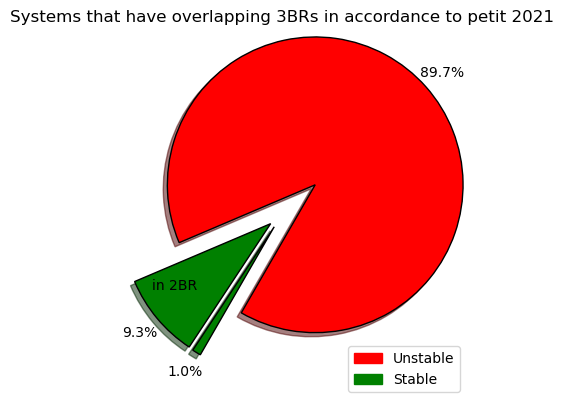

In [192]:
import matplotlib.pyplot as plt 

import matplotlib.patches as mpatches

explode = (.3, .1, .1)  # only "explode" the 2nd slice (i.e. 'Hogs')
red = mpatches.Patch(color='red', label='Unstable')
green = mpatches.Patch(color='green', label='Stable')


           
fig, ax = plt.subplots()
ax.pie([29709, 3082, 316], explode=explode, labels=["", "in 2BR", ""],wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True}, colors=['red','green','green'],autopct='%1.1f%%', pctdistance=1.15,labeldistance=.65,
       shadow=True, startangle=-120)
plt.title('Systems that have overlapping 3BRs in accordance to petit 2021')
#plt.legend()
plt.legend(handles=[red,green])
plt.show()

In [106]:
temp['Stable'].value_counts()

Stable
False    29709
True      3398
Name: count, dtype: int64

In [108]:
temp = temp.drop(temp[temp['Stable']==False].index)

In [109]:
temp['in2BR'].value_counts()

in2BR
True     3082
False     316
Name: count, dtype: int64

In [89]:
temp['Stable'].value_counts()

Stable
False    13376
True      3082
Name: count, dtype: int64

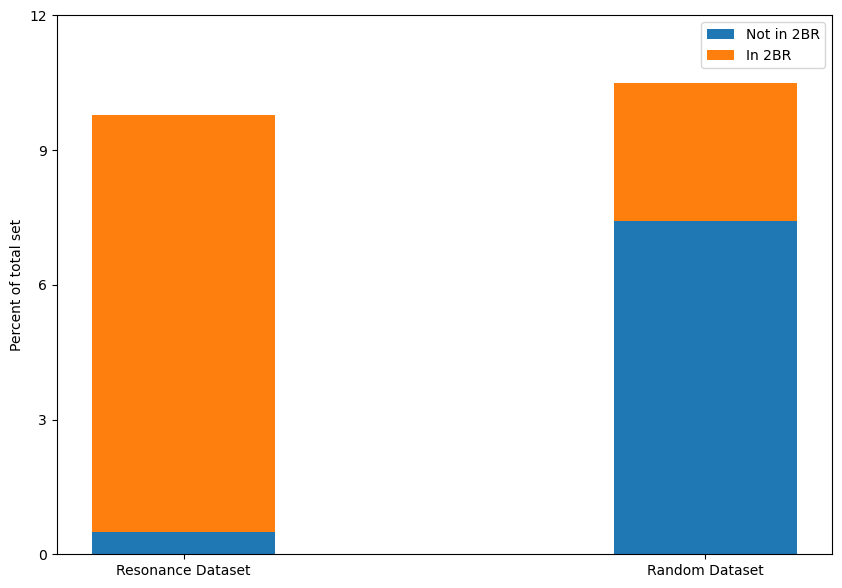

In [18]:

N = 2

No = (out2(res,mres),out2(rand,mrand))
Yes = (in2(res,mres),in2(rand,mrand))

ind = np.arange(N)   
width = 0.35  

fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, No, width)
p2 = plt.bar(ind, Yes, width,
             bottom = No)

plt.ylabel('Percent of total set')
#plt.title('Contribution by the teams')
plt.xticks(ind, ('Resonance Dataset', 'Random Dataset'))
plt.yticks(np.arange(0, 15, 3))
plt.legend((p1[0], p2[0]), ('Not in 2BR', 'In 2BR'))

plt.show()

In [47]:
mres.describe()

,index,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,twoMMRstrengthnear,MMRstrengthWnear,MMRstrengthWMAXnear,twoMMRstrengthWnear,twoMMRstrengthWMAXnear,...,Zcrit12,Zval23,Zcrit23,IntZval12,IntZval23,3BRfirstfillfac,instability_time,shadow_instability_time,hasnull,logSTD
count,30993.000000,30993.000000,30993.000000,30993.000000,30993.000000,30993.000000,30993.000000,30993.000000,30993.000000,30993.000000,...,3.099300e+04,30993.000000,3.099300e+04,30993.000000,30993.000000,30993.000000,3.099300e+04,3.099300e+04,30993.0,30993.000000
mean,81526.266576,0.078435,0.087144,0.003374,0.395153,0.045765,0.006997,0.011735,0.007738,0.012178,...,9.882624e+03,0.021821,1.478277e+06,0.034795,0.029015,0.157083,1.187014e+08,1.226361e+08,0.0,0.122726
std,32778.196967,0.041203,0.104221,0.006212,2.056873,0.691584,0.041651,0.133646,0.040512,0.133755,...,2.852704e+05,0.022500,2.563710e+08,0.035380,0.025101,0.222675,3.089441e+08,3.149725e+08,0.0,0.950870
min,25000.000000,0.012845,0.002286,0.000005,0.002441,0.000578,0.000023,0.000079,0.000126,0.000215,...,1.318107e+00,0.000012,1.236811e+00,0.000165,0.000142,0.001917,1.000304e+04,0.000000e+00,0.0,-2.157671
25%,53095.000000,0.047100,0.028776,0.000390,0.065996,0.014690,0.001408,0.002448,0.001864,0.002507,...,1.760586e+00,0.006935,1.005688e+01,0.012711,0.011982,0.049761,4.412005e+04,4.089635e+04,0.0,-0.735347
50%,81164.000000,0.069231,0.051520,0.001192,0.138753,0.023512,0.003151,0.005111,0.003941,0.005265,...,3.136975e+00,0.014827,5.177525e+01,0.024443,0.022190,0.107889,2.095508e+05,2.045840e+05,0.0,-0.153842
75%,109831.000000,0.101391,0.107104,0.003660,0.414309,0.035239,0.007591,0.010944,0.008562,0.011213,...,3.248845e+01,0.028880,2.940249e+02,0.044774,0.038093,0.202049,3.738056e+06,3.771612e+06,0.0,1.051128
max,138538.000000,0.312347,3.848709,0.170533,218.378562,82.427281,3.603727,17.123111,3.589497,17.121970,...,2.536438e+07,0.296952,4.513271e+10,0.567418,0.311658,20.017639,1.000000e+09,1.000000e+09,0.0,2.218697
